In [1]:
import zipfile

In [2]:
f1=zipfile.ZipFile("dataset.zip")
f1.extractall()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img("dataset/training_set/dogs/dog.1.jpg")  # this is a PIL image
x = img_to_array(img) 

In [5]:
x.shape

(499, 327, 3)

In [6]:
x = x.reshape((1,) + x.shape) 

In [7]:
x.shape

(1, 499, 327, 3)

In [8]:

i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview',save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 20:
        break 

In [9]:
from tensorflow.keras import backend as K 
import numpy as np
np.random.seed(0)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [11]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary',shuffle=True)  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary',shuffle=True)

Found 8002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
from livelossplot import PlotLossesKerasTF

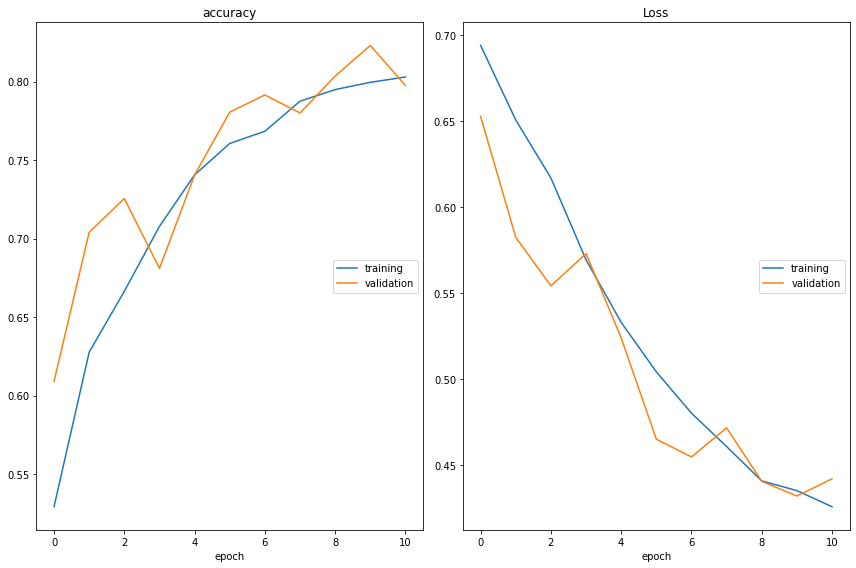

accuracy
	training         	 (min:    0.529, max:    0.803, cur:    0.803)
	validation       	 (min:    0.609, max:    0.823, cur:    0.798)
Loss
	training         	 (min:    0.426, max:    0.694, cur:    0.426)
	validation       	 (min:    0.432, max:    0.653, cur:    0.442)
500/500 [==============================] - 218s 436ms/step - loss: 0.4258 - accuracy: 0.8029 - val_loss: 0.4420 - val_accuracy: 0.7975
Epoch 12/50
209/500 [===========>..................] - ETA: 1:58 - loss: 0.4041 - accuracy: 0.8203

KeyboardInterrupt: 

In [14]:
model.fit(
        train_generator,
        steps_per_epoch=8002 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size,callbacks=[PlotLossesKerasTF()])


In [16]:
model.save_weights('1st_try.h5')  # saving weights

In [17]:
model.save("dogs_cats_model.h5")

In [18]:
img = load_img('dog_img.jpg',target_size=(150,150))  # giving an image to model.
x = img_to_array(img)  
x = x.reshape((1,) + x.shape) 

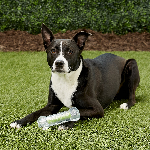

In [19]:
img

In [20]:
model.predict(x)

array([[1.]], dtype=float32)

In [21]:
img = load_img('dataset/training_set/cats/cat.1009.jpg',target_size=(150,150))  
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  

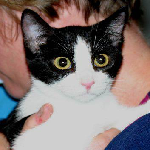

In [22]:
img

In [23]:
model.predict(x)

array([[0.]], dtype=float32)

In [24]:
np.round(model.predict(x)[0])

array([0.], dtype=float32)